In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset

In [35]:

df = pd.read_csv("C:\\Users\\sweth\\Downloads\\my projects\\pizza.csv")


# Data Cleaning

In [36]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Convert 'order_date' to datetime format
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')

# Check data types
print(df.dtypes)

# Convert 'quantity' and 'total_price' to numeric
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['total_price'] = pd.to_numeric(df['total_price'], errors='coerce')


pizza_id             48400
order_id             48400
pizza_name_id        48400
quantity             48400
order_date           48400
order_time           48400
unit_price           48400
total_price          48400
pizza_size           48400
pizza_category       48400
pizza_ingredients    48400
pizza_name           48400
dtype: int64
pizza_id                    float64
order_id                    float64
pizza_name_id                object
quantity                    float64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object


#Exploratory Data Analysis (EDA)

 What is the distribution of pizza sizes?

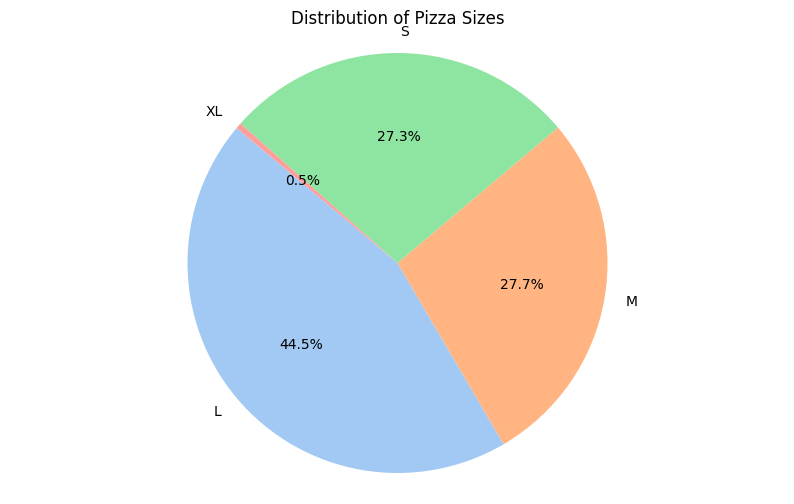

In [43]:

# Calculate the count of each pizza size
size_counts = df['pizza_size'].value_counts()

# Define colors for the pie chart
colors = sns.color_palette("pastel")[0:len(size_counts)]

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Pizza Sizes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



What are the top 5 most popular pizza names?

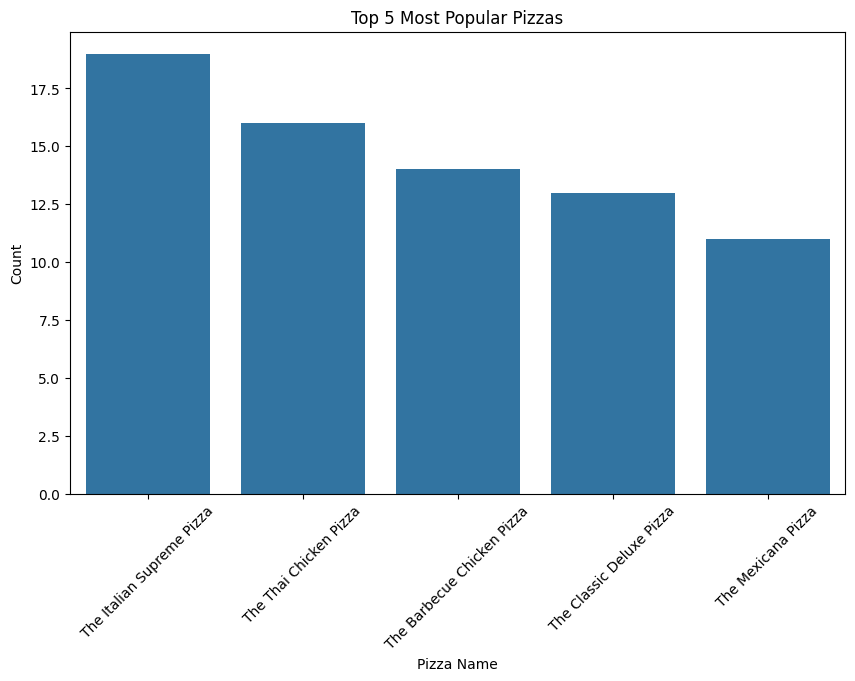

In [38]:
top_pizzas = df['pizza_name'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_pizzas.index, y=top_pizzas.values)
plt.title('Top 5 Most Popular Pizzas')
plt.xlabel('Pizza Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


What is the total revenue generated from each pizza category?

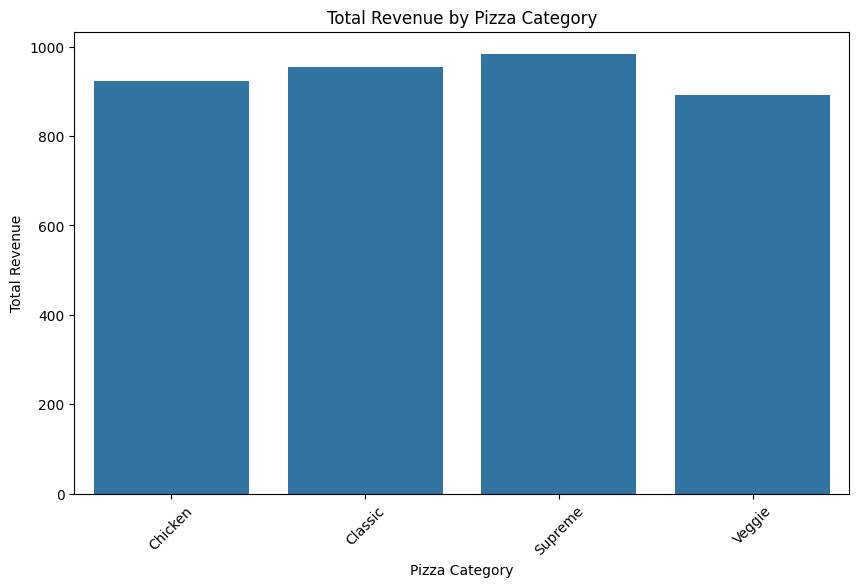

In [45]:
# Calculate total revenue by pizza category
revenue_by_category = df.groupby('pizza_category')['total_price'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_category, x='pizza_category', y='total_price')
plt.title('Total Revenue by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


How do the total prices compare across different pizza sizes?

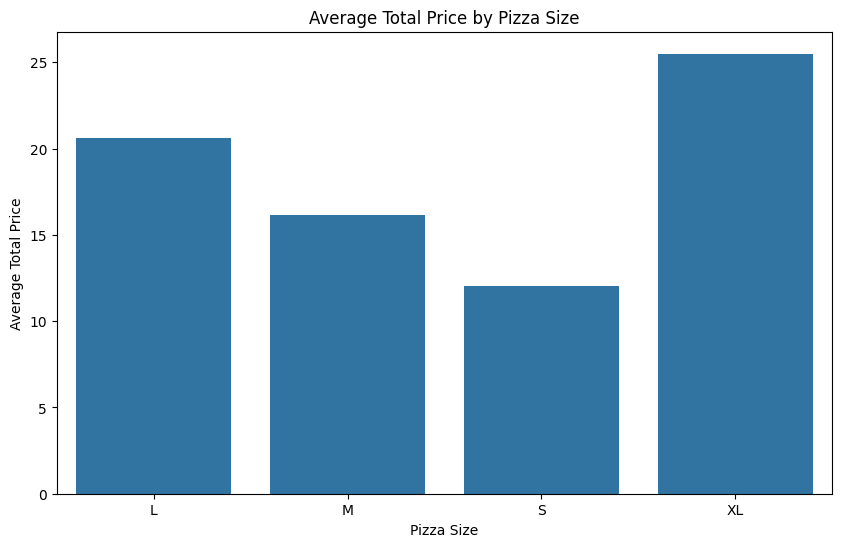

In [42]:
# Calculate average total price by pizza size
avg_total_price_by_size = df.groupby('pizza_size')['total_price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_total_price_by_size, x='pizza_size', y='total_price')
plt.title('Average Total Price by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Average Total Price')
plt.show()
